# This is the notebook to explore titanic data (Exploratory Data Analytics)

In [3]:
# Importing all the libraries needed for the EDA of titanic data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#set seaborn style
sns.set(style="whitegrid")

## Loading the data from test.csv

In [4]:
#Load training data and test datasets
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")

# Check shape of the dataframes
print("Train Shape: ", train_df.shape)
print("Test Shape: ", test_df.shape)


Train Shape:  (891, 12)
Test Shape:  (418, 11)


In [5]:
# Previewing the data of train dataframe showing the first 5 rows
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [8]:
# Total number of missing values in each column
# train_df.isnull().sum().sort_values(ascending=False)

#Total number of rows
total_rows=len(train_df)

#Create a summary dataframe
missing_summary=pd.DataFrame({
    'Missing Values':train_df.isnull().sum(),
    'Total Values':total_rows,
})

#Add percentage of missing values
missing_summary['% Missing']=((missing_summary['Missing Values']/total_rows)*100).round(2)

#Sort by most missing
missing_summary=missing_summary.sort_values(by='Missing Values',ascending=False)
missing_summary

,Missing Values,Total Values,% Missing
Cabin,687,891,77.10
Age,177,891,19.87
Embarked,2,891,0.22
PassengerId,0,891,0.00
Survived,0,891,0.00
Pclass,0,891,0.00
Name,0,891,0.00
Sex,0,891,0.00
SibSp,0,891,0.00
Parch,0,891,0.00


### Target variable analysis -Survived
Understanding the distribution of the target variable (survived) before digging into relationships

In [9]:
# View How many passengers survived (1) and did not survive (0)
print("Count of each class in Survived column:")
print(train_df['Survived'].value_counts())

Count of each class in Survived column:
Survived
0    549
1    342
Name: count, dtype: int64


In [10]:
# View the percetage distribution for each survival class
print("\n Percentage of passengers who survived vs did not surviveL:")
print(train_df['Survived'].value_counts(normalize=True).round(2)*100)


 Percentage of passengers who survived vs did not surviveL:
Survived
0    62.0
1    38.0
Name: proportion, dtype: float64


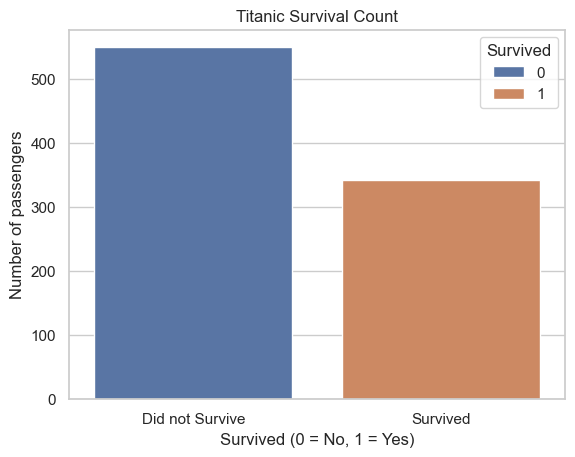

In [11]:
# Visualize th absolute number of passengers who survived vs did not
sns.countplot(data=train_df,x='Survived',hue='Survived')
plt.title('Titanic Survival Count',fontsize=12)
plt.xticks([0,1],['Did not Survive','Survived'])
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel("Number of passengers")

#Show plt
plt.show()

## Analyzing survival based on gender _(Sex)_
See how survival varied between male and female passengers. As gender is cited as key factor in survival - Testing the hypothesis

In [12]:
# Group dataset by 'Sex' and calculate mean survival rate for each gender
print("Average survival rate by Gender:")
#df.groupedby() seperates male and female then .mean() gives the average value of the survived column (Which is 0 or 1)
print(train_df.groupby('Sex')['Survived'].mean().round(2))
# Average = Proportion of survivors in each group


Average survival rate by Gender:
Sex
female    0.74
male      0.19
Name: Survived, dtype: float64


As per the analysis above female survival rate is 0.74 where as male survival rate is 0.19 that means gender had a huge impact on survival

## Visualize survival rate by gender (Bar Plot)

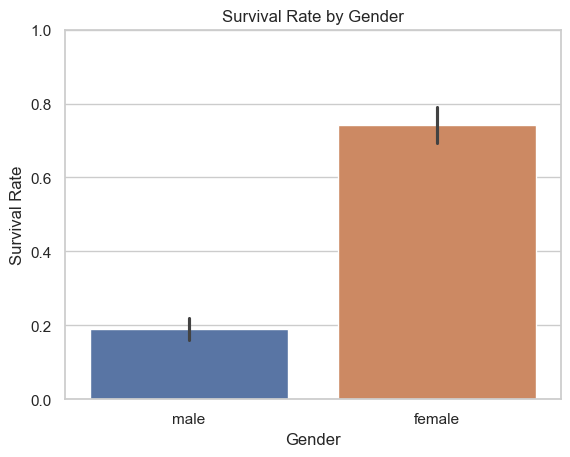

In [13]:
# Bar plt showing average survuval rate for each gender
sns.barplot(data=train_df,x='Sex',y='Survived',hue='Sex')

#Formatting the plot
plt.title("Survival Rate by Gender",fontsize=12)
plt.ylabel('Survival Rate')
plt.xlabel('Gender')
plt.ylim(0,1) # Set y-axis from 0 to 1 for clarity

plt.show()

The above Survival Rate By Gender plot also clearly shows that Female had significantly more survival rate than men.
Meaning WOMEN are prioritized during rescue effort :)

# Survival based on the passenger class _(Pclass)_
Passenger class (1st, 2nd, 3rd) also strongly influenced survival chances. 

In [14]:
# Grouping by Pclass to see how survival rate diffes by ticket class
print("Average Survival rate by passenger class:")
print(train_df.groupby('Pclass')['Survived'].mean().round(2))

Average Survival rate by passenger class:
Pclass
1    0.63
2    0.47
3    0.24
Name: Survived, dtype: float64


Based on the grouping above, Survival Rates of
- First class passengers (Pclass = 1) was 0.63
- Second Class passengers (Pclass = 2) was 0.47
- Third class passengers (Pclass = 3) was 0.24
<br>Does this actually mean lowe class -> less likely to survive?

### Visualizing survival rate by passenger class (Bar plot)

<function matplotlib.pyplot.show(close=None, block=None)>

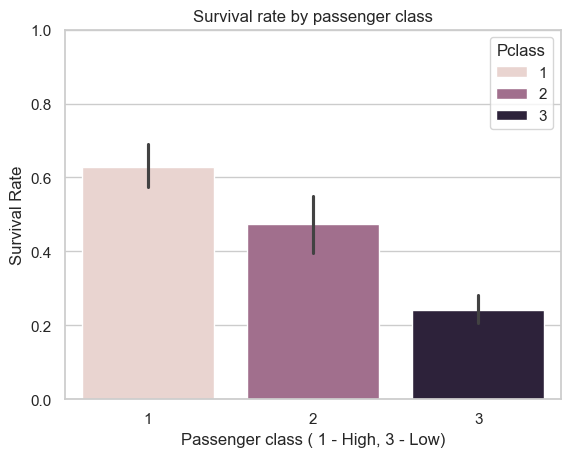

In [15]:
# Bar plt showing survival rate per passenger class
sns.barplot(data=train_df,x='Pclass',y='Survived',hue='Pclass')
plt.title("Survival rate by passenger class",fontsize=12)
plt.xlabel('Passenger class ( 1 - High, 3 - Low)')
plt.ylabel('Survival Rate')
plt.ylim(0,1)

plt.show

Clearly from te above chart, we can see that how the passenger class affected the survival rate.

## Analyzing survival based on port of Embarkation _(Embarked)_
Goal here is to see if the port where a passenger boarded the ship influenced their survival rate or not

In [16]:
# Display the unique embarkation points and their counts

print("Unique embarkation ports and counts:")
print(train_df['Embarked'].value_counts())

Unique embarkation ports and counts:
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


From above 
- S is Southampton
- C is Cherbourg
- Q is Queenstown

In [17]:
# Calculate the survival rate by embakration point
print("Average survival rate by embarkation points:")
print(train_df.groupby('Embarked')['Survived'].mean().round(2))

Average survival rate by embarkation points:
Embarked
C    0.55
Q    0.39
S    0.34
Name: Survived, dtype: float64


From above figures people who had embarked in Cherbourg (C) had better odds of survival

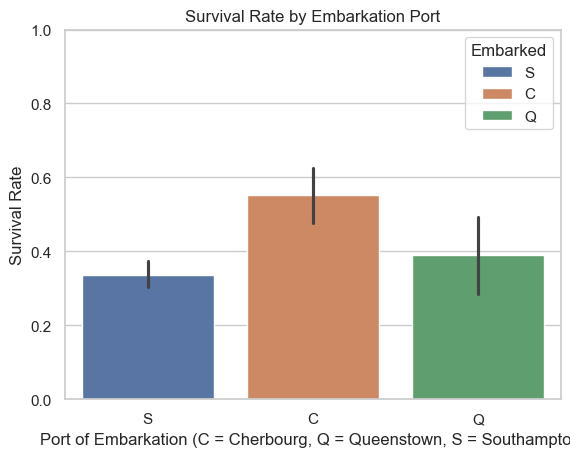

In [21]:
# Barplot of survival rate per embarkation port

sns.barplot(data=train_df, x='Embarked', y='Survived', hue='Embarked')

# Plot formatting
plt.title('Survival Rate by Embarkation Port', fontsize=12)
plt.xlabel('Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.show()


From above figures people who had embarked in Cherbourg (C) had better odds of survival

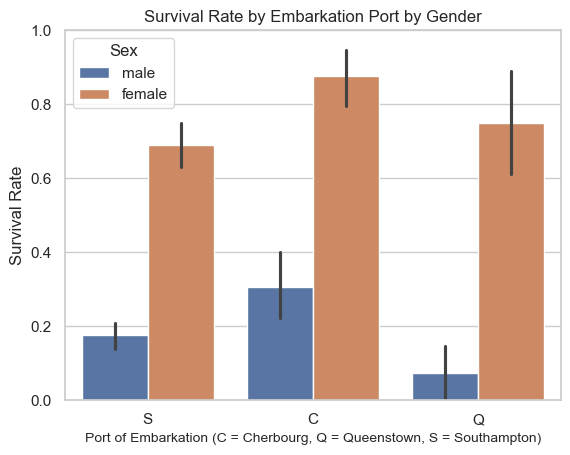

In [48]:
# Barplot of survival rate per embarkation per gender

sns.barplot(data=train_df, x='Embarked', y='Survived', hue='Sex')

# Plot formatting
plt.title('Survival Rate by Embarkation Port by Gender', fontsize=12)
plt.xlabel('Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)',fontsize=10)
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.show()


# Analyzing age and Fare - Continuous features

In [24]:
# Descriptive statistics for Age and Fare
train_df[['Age','Fare']].describe().round(2)

,Age,Fare
count,714.00,891.00
mean,29.70,32.20
std,14.53,49.69
min,0.42,0.00
25%,20.12,7.91
50%,28.00,14.45
75%,38.00,31.00
max,80.00,512.33


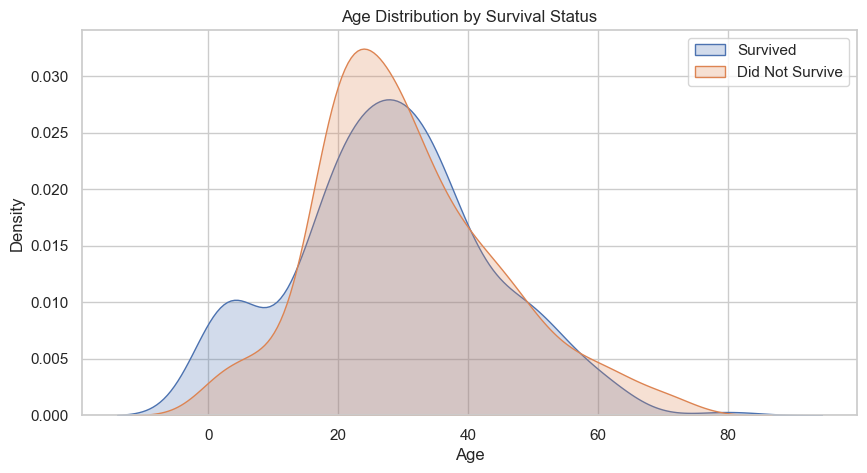

In [29]:
# Age distribution with Kernel Density Estimation (KDE)

plt.figure(figsize=(10,5))
sns.kdeplot(data=train_df[train_df['Survived'] == 1]['Age'], label='Survived', fill=True)
sns.kdeplot(data=train_df[train_df['Survived'] == 0]['Age'], label='Did Not Survive', fill=True)

plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()


* Based on the visualization the majority of the distribution is between 20 & 30 

## Converting ages into ranges
This simplification helos compare survival odds across life stages

In [31]:
# Create Age bins

bins = [0, 12, 18, 35, 60, 100]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=bins, labels=labels)

# Show first few rows with AgeGroup added
train_df[['Age', 'AgeGroup']].head()


,Age,AgeGroup
0,22.0,Young Adult
1,38.0,Adult
2,26.0,Young Adult
3,35.0,Young Adult
4,35.0,Young Adult


In [32]:
# Age Groups vs survival rate
print(train_df.groupby('AgeGroup')['Survived'].mean().round(2))

AgeGroup
Child          0.58
Teen           0.43
Young Adult    0.38
Adult          0.40
Senior         0.23
Name: Survived, dtype: float64


C:\Users\Raksh\AppData\Local\Temp\ipykernel_19812\127895678.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(train_df.groupby('AgeGroup')['Survived'].mean().round(2))


Based on the above data, childres were prioritized during the rescue, with survival rate of 0.58, followed by Teens, Adults, young adults, Followed by senior Age group

## Visualizing age group vs Survival rate

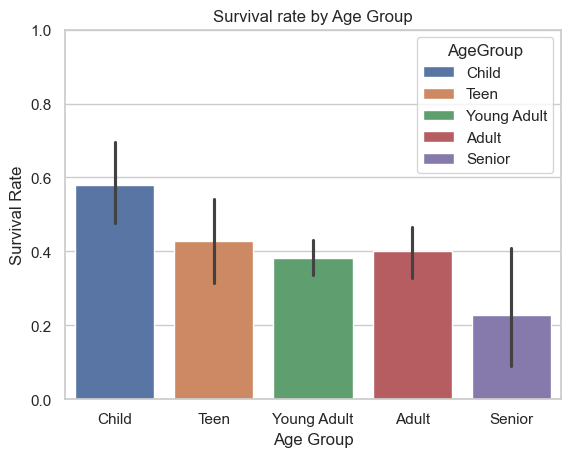

In [35]:
# Barplot of survival rate per age group
sns.barplot(data=train_df, x='AgeGroup',y='Survived',hue='AgeGroup')
plt.title('Survival rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.ylim(0,1)

plt.show()

The bar plot reinforces what we saw above
</br> Children and teens may have had priority evacuation ("Women andChildre First")
</br> Below is the plot grouping the Age Group again by Gender

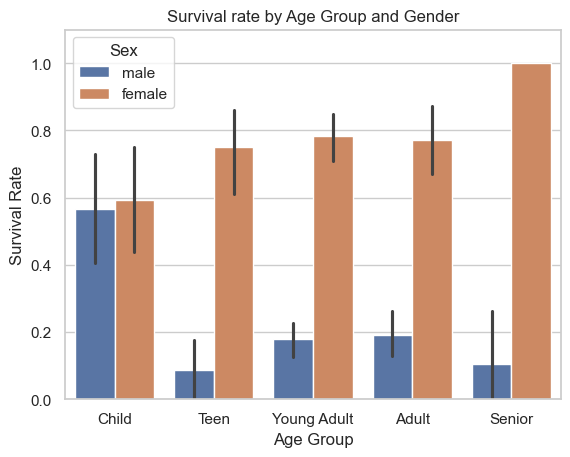

In [49]:
# Barplot of survival rate per age group
sns.barplot(data=train_df, x='AgeGroup',y='Survived',hue='Sex')
plt.title('Survival rate by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.ylim(0,1.1)

plt.show()

Based on the graph above, 
* Among children (0-12) the survival rate of both male and female are at approximately same
* Among all the other category, the survival rate of Female is significantly higher than Male.

## Fare vs Survival
Analyzing if the people who paid more had a better survival rate

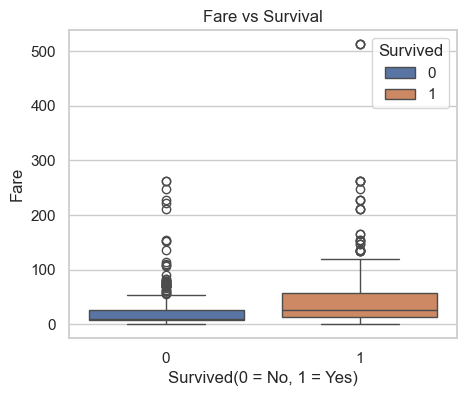

In [47]:
# Fare and survival comparison using boxplot
plt.figure(figsize=(5,4))
sns.boxplot(x='Survived',y='Fare',data=train_df,hue='Survived')

plt.title('Fare vs Survival')
plt.xlabel('Survived(0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.show()

Looking at the graphical representation above, Higher fare -> better chance of survival/resuce

## Visualizing Fare distribution

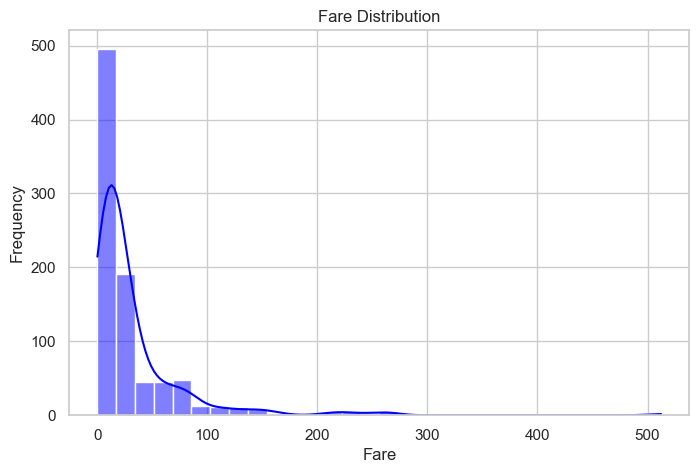

Skewness of Fare: 4.79


In [52]:
# Visualize distribution of Fare
plt.figure(figsize=(8,5))
sns.histplot(train_df['Fare'],bins=30,kde=True,color='blue')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#Check for skewness
print(f"Skewness of Fare: {train_df['Fare'].skew():.2f}")

In [62]:
# Create Fare Bins (e.g., 4 equal-sized bins)
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)

# Check survival rate for each fare band
fare_survival = train_df.groupby('FareBand')['Survived'].mean().round(2)
print("Survival Rate by Fare Band:")
print(fare_survival)


Survival Rate by Fare Band:
FareBand
(-0.001, 7.91]     0.20
(7.91, 14.454]     0.30
(14.454, 31.0]     0.45
(31.0, 512.329]    0.58
Name: Survived, dtype: float64


C:\Users\Raksh\AppData\Local\Temp\ipykernel_19812\1423423043.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_survival = train_df.groupby('FareBand')['Survived'].mean().round(2)


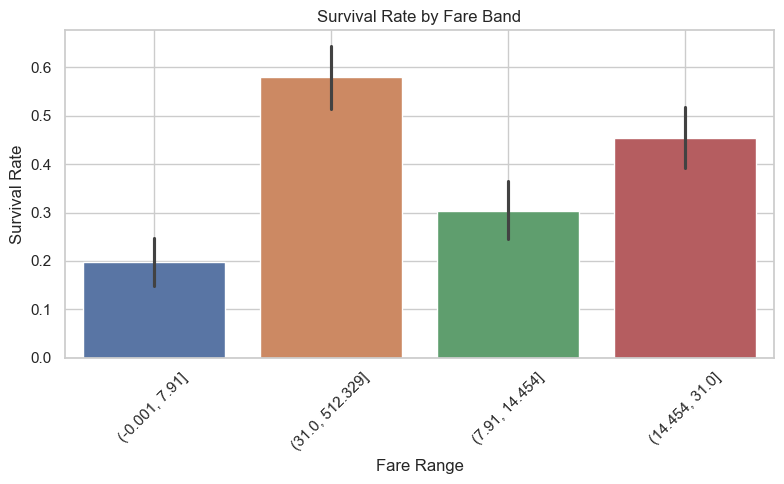

In [65]:
# Convert FareBand to string for easier plotting
train_df['FareBandStr'] = train_df['FareBand'].astype(str)

plt.figure(figsize=(8, 5))
sns.barplot(data=train_df, x='FareBandStr', y='Survived', hue='FareBandStr')
plt.xticks(rotation=45)
plt.title('Survival Rate by Fare Band')
plt.ylabel('Survival Rate')
plt.xlabel('Fare Range')
plt.grid(True)
plt.tight_layout()
plt.show()


# Correlation Analysis - Spot relationship across features
Understand how different numberical features relate to Survived, and identify multicollinearity

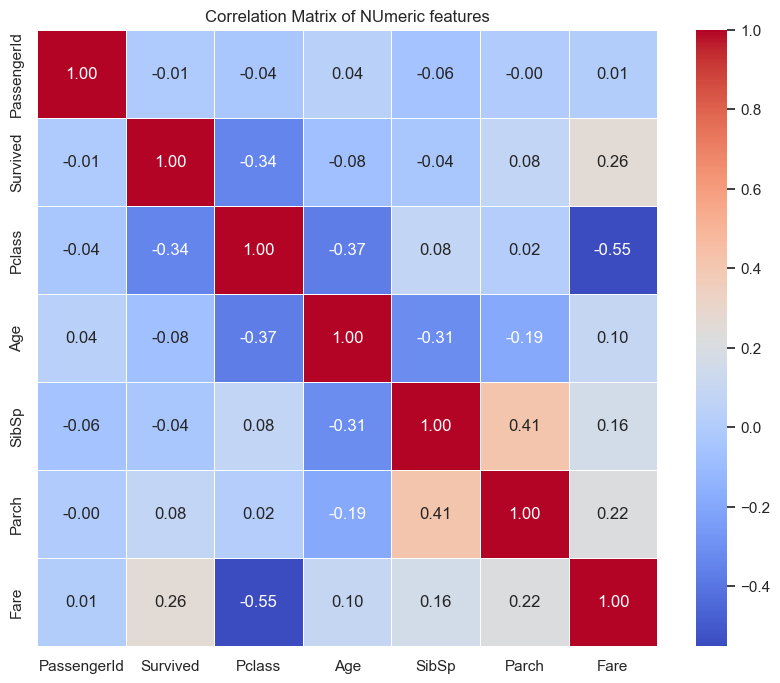

In [68]:
# Select only numberic features for correlation analysis
numeric_features = train_df.select_dtypes(include=['int64','float64']) #select_dtypes() helps isolate only numeric columns (Age, Fare, Pclass etc.)

#Compute the correlation matrix
correlation_matrix=numeric_features.corr() #corr() calculates the pearson correlation between every pair of feature

#Display the correlation matrix as heatmap
#Heatmap Dark red or Blue = Stronger correlation (Either positive or Negative) Closer to 0 means no linear relationship

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt=".2f", linewidth=0.5)
plt.title('Correlation Matrix of NUmeric features')
plt.grid(False)
plt.show()

###  Correlation Matrix Interpretation

This heatmap shows the **Pearson correlation coefficients** between numeric features in the Titanic dataset. The values range from **-1 (strong negative correlation)** to **+1 (strong positive correlation)**:

####  Key Observations:

1. **Survived vs Pclass (`-0.34`)**  
   - Moderate **negative correlation**  
   - Indicates that passengers in higher classes (1st class) had a better chance of survival.

2. **Survived vs Fare (`+0.26`)**  
   - Weak **positive correlation**  
   - Suggests that passengers who paid higher fares had a slightly better chance of survival.

3. **Survived vs Age (`-0.08`)**  
   - Very weak **negative correlation**  
   - Older passengers were slightly less likely to survive, but the relationship is weak.

4. **Pclass vs Fare (`-0.55`)**  
   - Strong **negative correlation**  
   - Higher class passengers (1st class) paid significantly more than lower class passengers.

5. **SibSp vs Parch (`+0.41`)**  
   - Moderate **positive correlation**  
   - Families often traveled together, so the number of siblings/spouses and parents/children is somewhat related.

6. **Age vs Pclass (`-0.37`)**  
   - Moderate **negative correlation**  
   - Older passengers were more likely to be in higher classes.


- `PassengerId` is uncorrelated with any feature (as expected — it's just an index).
- Most features show **weak correlations** with survival, reinforcing the need for **feature engineering** (e.g., creating `Title`, `FamilySize`, `CabinGroup`).
- Keep in mind: Correlation does not imply causation — these patterns help guide which features may be useful for modeling.


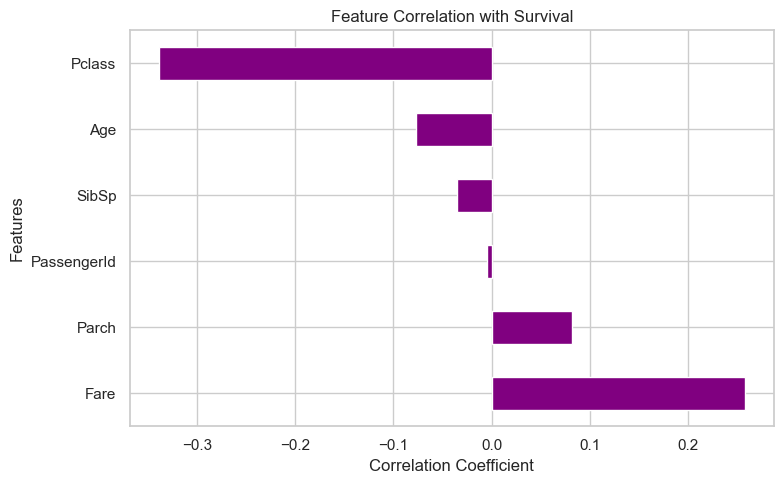

In [80]:
# Correlation with 'Survived'
survived_corr = correlation_matrix['Survived'].drop('Survived').sort_values(ascending=False)

# Plot as horizontal bar chart
plt.figure(figsize=(8, 5))
survived_corr.plot(kind='barh', color='purple')
plt.title('Feature Correlation with Survival')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.grid(True)
plt.tight_layout()
plt.show()


## Feature Engineering

To extract more insight from our existing data, we are engineering new features that better capture relationships that may influence survival. This process helps us uncover patterns that are not immediately visible in the raw dataset.


In [91]:
# Extract and normalize social titles from the Name column in both train and test datasets
for dataset in [train_df, test_df]:
    # Extract the title using regex: the part after the comma and before the period
    dataset['Title'] = dataset['Name'].str.extract(r',\s*([^\.]*)\s*\.', expand=False)
    
    # Standardize similar titles and group rare titles into broader categories
    dataset['Title'] = dataset['Title'].replace({
        'Mlle': 'Miss',
        'Ms': 'Miss',
        'Mme': 'Mrs',
        'Lady': 'Royalty', 'Countess': 'Royalty', 'Dona': 'Royalty',
        'Capt': 'Officer', 'Col': 'Officer', 'Major': 'Officer', 'Dr': 'Officer', 'Rev': 'Officer',
        'Sir': 'Royalty', 'Don': 'Royalty', 'Jonkheer': 'Royalty'
    })


In [92]:
# Create a new feature representing total family size onboard (SibSp + Parch + Self)
for dataset in [train_df, test_df]:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1


In [93]:
# Create a binary feature to indicate whether the passenger is traveling alone
for dataset in [train_df, test_df]:
    dataset['IsAlone'] = (dataset['FamilySize'] == 1).astype(int)


In [94]:
# Define a function to categorize age into meaningful age groups
def categorize_age(age):
    if pd.isnull(age):
        return 'Unknown'
    elif age < 12:
        return 'Child'
    elif age < 18:
        return 'Teen'
    elif age < 35:
        return 'Young Adult'
    elif age < 60:
        return 'Adult'
    else:
        return 'Senior'

# Apply the categorization function to both train and test datasets
for dataset in [train_df, test_df]:
    dataset['AgeGroup'] = dataset['Age'].apply(categorize_age)


### Survival Rate by Title

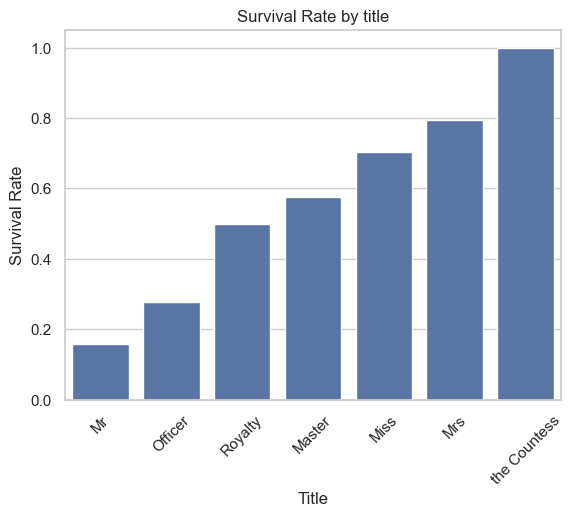

In [96]:
#Calculate the survival rate by title
title_survival=train_df.groupby('Title')['Survived'].mean().sort_values(ascending=True)

# Bar plot for survival rates by title
sns.barplot(x=title_survival.index,y=title_survival.values)
plt.title('Survival Rate by title')
plt.ylabel('Survival Rate')
plt.xlabel('Title')
plt.xticks(rotation=45)
plt.show()

Titles reveal a stron social stratification: Those with novel or respected titles had very high survival rates, while men with title "Mr" had the lowest. This likely reflects the prioritization of women and high ranking individuals during lifeboat loading. Rare titles also may reflect 1st class status, contributing to survival likelihood.

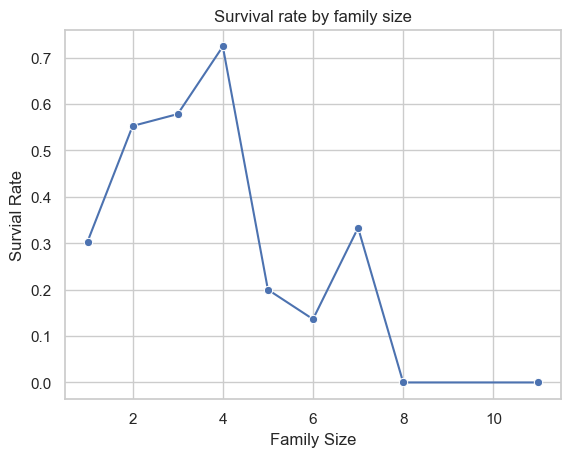

In [97]:
#Calculate Survival Rate by family size
family_survival=train_df.groupby('FamilySize')['Survived'].mean()

#Line plot for survival rate by family size
sns.lineplot(x=family_survival.index, y=family_survival.values, marker='o')
plt.title('Survival rate by family size')
plt.xlabel('Family Size')
plt.ylabel('Survial Rate')
plt.grid(True)
plt.show()

Small families (2-4) had the highest survival rates, possibly because they could stay together and help each other. Very large families (6+) had much lower survival rates, possibly due to difficulty in evacuating as a group. Single Travellers had lower survival rates as well, supporting the findings from the `IsAlone` feature

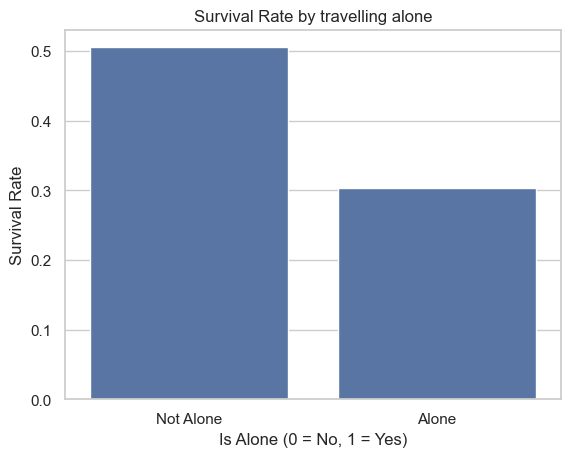

In [98]:
# Survival Rate comparison: Alone vs not alone
alone_survival=train_df.groupby('IsAlone')['Survived'].mean()

#Bar plot for IsAlone vs Survival
sns.barplot(x=alone_survival.index,y=alone_survival.values)
plt.title('Survival Rate by travelling alone')
plt.xlabel('Is Alone (0 = No, 1 = Yes)')
plt.ylabel('Survival Rate')
plt.xticks([0,1],['Not Alone','Alone'])
plt.show()

Passengers who were not travelling alone had significantly higher survival rates compared to those who were alone. This could suggest that being ith family or companions increased the likelihood of receiving assistance during evacuations or being prioritized for lifeboats

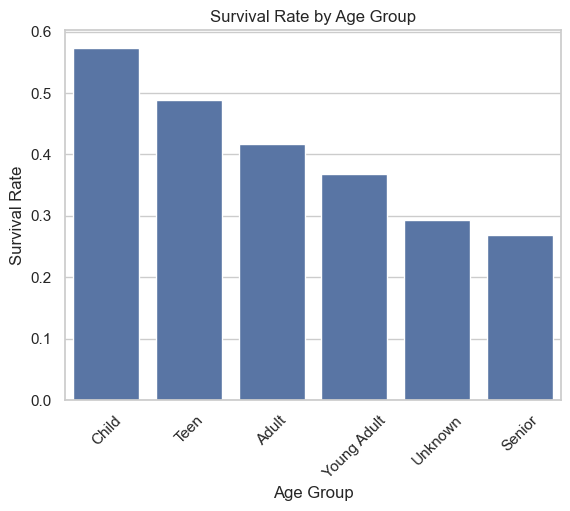

In [102]:
# Calculate survival rate by AgeGroup
agegroup_survival = train_df.groupby('AgeGroup')['Survived'].mean().sort_values(ascending=False)

# Bar plot for AgeGroup
sns.barplot(x=agegroup_survival.index, y=agegroup_survival.values)
plt.title('Survival Rate by Age Group')
plt.ylabel('Survival Rate')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.show()


Children had the highest survival rate, followed by teens and adults. This may reflect a "WOMEN & CHILDREN FIRST" evacuation policy during disasters. Survival rates dropped steadily with age, with seniors having the lowest likelihood of survival. The "Unknown" group also performed poorly, likely due to missing age data. 

##  EDA Summary

Through this Exploratory Data Analysis, we gained several key insights:

- **Age and Survival**: Children and teenagers had a significantly higher chance of survival, aligning with evacuation priority norms.
- **Family Dynamics**: Passengers traveling with small families (2–4 members) had better survival chances compared to solo travelers or large families.
- **Social Status**: Titles extracted from names revealed that women and socially important passengers had much higher survival rates than men, particularly those with the title "Mr".
- **Being Alone Matters**: "IsAlone" was a strong indicator—solo travelers had a significantly lower survival rate.
- **Data Gaps Identified**: Some passengers had missing values for Age, Cabin, or Embarked, which were addressed through imputation or feature engineering.

These insights help us engineer meaningful features and prepare the data for predictive modeling.


In [103]:
# Export cleaned and feature-engineered data for modeling on a later stage
train_df.to_csv("train_cleaned.csv", index=False)
test_df.to_csv("test_cleaned.csv", index=False)

print("Cleaned datasets saved successfully!")


Cleaned datasets saved successfully!
